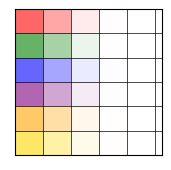

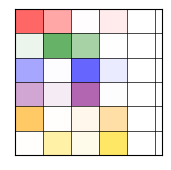

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import random
import os

# Figure dir
figDir = os.path.join(os.getcwd(), 'figures_output')
if not os.path.isdir(figDir):
    os.makedirs(figDir)


# Create images corresponding to the train/test split (SampleCounts 6, 4) and the process post feature selection (RegionCount 6, 4)
sampleCount = [6]
RegionCount = [6]

# Create all possible combinations
allCombs = []
for i in range(len(sampleCount)):
    for j in range(len(RegionCount)):
        allCombs.append((RegionCount[j], sampleCount[i]))

# Define colors for the columns
colors = ['red', 'green', 'blue', 'purple', 'orange', 'gold'] # Full set
colorSub = ['red', 'green', 'purple', 'orange'] # subset to show feature selection

# Define the number of gradient steps and grid size
num_steps = 6
color_step = .16
gridFigSize = (1.896, 1.896)

# Displaying the shadow feature set in Figure 3A requires shuffling. 
perRow = [True, False]
shuffleSet = [False, True]
shuffleSet_name = ['Grid.svg', 'Grid_Shuffle.svg']

# Create factor for alpha modulation
# alphaSet = np.linspace(0.9, .05, num_steps)
alphaSet = [0.8, 0.6, 0.35, 0.18, 0.08, 0.01]
gridlinewidth = 0.5

for grid_size in allCombs:
    for shuffle_switch, fName in zip(shuffleSet, shuffleSet_name):
        
        if grid_size[0] == 6:
            colorSet = colors
        else:
            colorSet = colorSub

        # Create a gradient matrix
        gradient_matrix = np.zeros((grid_size[0], grid_size[1], 4))
        for i in range(grid_size[0]):
            for j in range(grid_size[1]):
                color_index = min(j, len(colorSet) - 1)
                gradient_matrix[i, j] = mcolors.to_rgba(colorSet[color_index], alphaSet[i])

        # Remove the 1st and 4th rows to illustrate train/test split
        gradient_matrix = np.delete(gradient_matrix, [0, 3], axis=0)
        fName = f'droppedCols_{fName}'
        # grid_size = (grid_size[0], grid_size[1]-2)

        # Shuffle columns if needed
        if shuffle_switch:
            for col_i in np.arange(gradient_matrix.shape[1]):
                random.shuffle(gradient_matrix[:, col_i, 3])

        # Plotting
        columns = np.shape(gradient_matrix)[1]

        # Create the figure and axis
        fig, ax = plt.subplots(figsize=(gridFigSize[0], gridFigSize[1]))

        # Plot the gradient matrix as a colored table
        ax.imshow(np.swapaxes(gradient_matrix, 0, 1), aspect='auto')

        # Remove x and y ticks
        ax.set_xticks([])
        ax.set_yticks([])

        # Draw lines to separate cells
        for i in range(1, grid_size[1]):
            ax.axhline(i - 0.5, color='black', linewidth=gridlinewidth)
        for j in range(1, grid_size[0]):
            ax.axvline(j - 0.5, color='black', linewidth=gridlinewidth)

        fig.savefig(os.path.join(figDir, fName), format='svg', dpi=1200, bbox_inches='tight')